<Figure size 800x500 with 0 Axes>

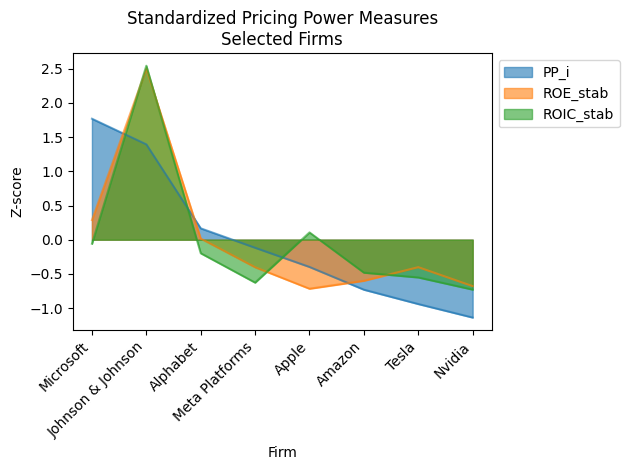

In [22]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load measurement CSVs
df_pp = pd.read_csv("C:/Users/Lfran/OneDrive/Master thesis/Pricing power/Measurement/0_Data/generated_csv/sp500_pricing_power.csv", usecols=['Ticker', 'Pricing Power'])
df_roe = pd.read_csv('C:/Users/Lfran/OneDrive/Master thesis/Pricing power/Measurement/0_Data/generated_csv/sp500_roe_power.csv', usecols=['Ticker', 'ROE Power'])
df_roic = pd.read_csv('C:/Users/Lfran/OneDrive/Master thesis/Pricing power/Measurement/0_Data/generated_csv/sp500_roic_power.csv', usecols=['Ticker', 'ROIC Power'])

# Merge into one DataFrame
df = df_pp.merge(df_roe, on='Ticker').merge(df_roic, on='Ticker')

# Select the firms of interest
firms = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'TSLA', 'JNJ', 'NVDA', 'META', 'XOM', 'BABA']
# Note: adjust tickers for Samsung, Xiaomi if present (e.g., '005930.KS', '1810.HK')
# Here we assume US ADR tickers or use Full Name if needed.

# Map some known names (if tickers differ in CSV)
ticker_map = {
    'AAPL': 'Apple', 'MSFT': 'Microsoft', 'AMZN': 'Amazon', 'GOOGL': 'Alphabet',
    'TSLA': 'Tesla', 'JNJ': 'Johnson & Johnson', 'NVDA': 'Nvidia', 'META': 'Meta Platforms',
    # Samsung and Xiaomi might not be in S&P500; drop or replace with equivalents if present
}

# Filter for those in our CSV
df_sel = df[df['Ticker'].isin(ticker_map.keys())].copy()
df_sel.index = df_sel['Ticker'].map(ticker_map)

# Standardize the three measures
scaler = StandardScaler()
measures = ['Pricing Power', 'ROE Power', 'ROIC Power']
df_std = pd.DataFrame(
    scaler.fit_transform(df_sel[measures]),
    index=df_sel.index,
    columns=['PP_i', 'ROE_stab', 'ROIC_stab']
)

# Plot area chart (unstacked)
plt.figure(figsize=(8, 5))
df_std.plot.area(stacked=False, alpha=0.6)
plt.title('Standardized Pricing Power Measures\nSelected Firms')
plt.ylabel('Z‑score')
plt.xlabel('Firm')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()


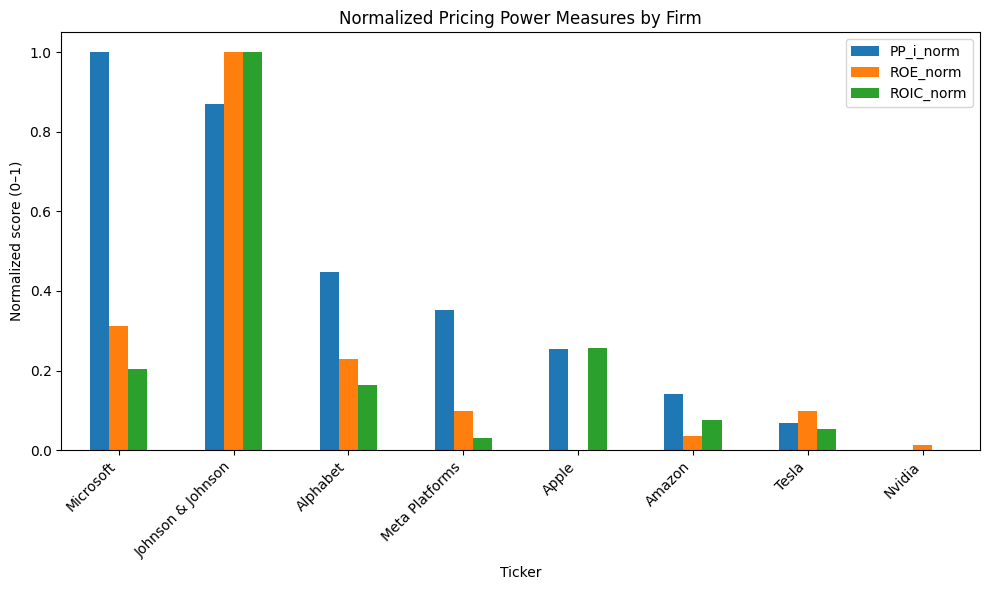

In [23]:
from sklearn.preprocessing import MinMaxScaler

measures = ['Pricing Power','ROE Power','ROIC Power']

# df_sel is your filtered DataFrame, with columns Ticker + the three measures
# pull out only the numeric columns:
X = df_sel[measures].values

scaler = MinMaxScaler(feature_range=(0,1))
X_norm = scaler.fit_transform(X)

# put back into a DataFrame for plotting
df_norm = pd.DataFrame(
    X_norm,
    index = df_sel.index,        # your mapped firm names
    columns = ['PP_i_norm','ROE_norm','ROIC_norm']
)

# now you can plot
ax = df_norm.plot.bar(figsize=(10,6))
ax.set_ylabel('Normalized score (0–1)')
ax.set_title('Normalized Pricing Power Measures by Firm')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


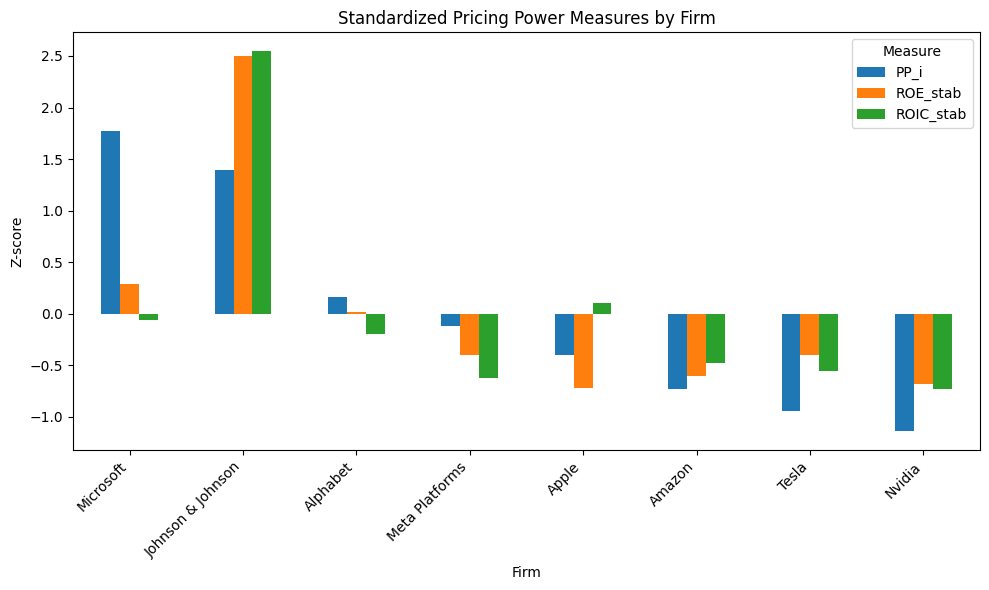

In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load measurement CSVs
df_pp = pd.read_csv('C:/Users/Lfran/OneDrive/Master thesis/Pricing power/Measurement/0_Data/generated_csv/sp500_pricing_power.csv', usecols=['Ticker', 'Pricing Power'])
df_roe = pd.read_csv('C:/Users/Lfran/OneDrive/Master thesis/Pricing power/Measurement/0_Data/generated_csv/sp500_roe_power.csv', usecols=['Ticker', 'ROE Power'])
df_roic = pd.read_csv('C:/Users/Lfran/OneDrive/Master thesis/Pricing power/Measurement/0_Data/generated_csv/sp500_roic_power.csv', usecols=['Ticker', 'ROIC Power'])

# Merge into one DataFrame
df = df_pp.merge(df_roe, on='Ticker').merge(df_roic, on='Ticker')

# Select firms of interest
ticker_map = {
    'AAPL': 'Apple', 'MSFT': 'Microsoft', 'AMZN': 'Amazon', 'GOOGL': 'Alphabet',
    'TSLA': 'Tesla', 'JNJ': 'Johnson & Johnson', 'NVDA': 'Nvidia', 'META': 'Meta Platforms'
}
df_sel = df[df['Ticker'].isin(ticker_map)].copy()
df_sel.index = df_sel['Ticker'].map(ticker_map)

# Standardize the three measures
scaler = StandardScaler()
measures = ['Pricing Power', 'ROE Power', 'ROIC Power']
df_std = pd.DataFrame(scaler.fit_transform(df_sel[measures]), index=df_sel.index, columns=['PP_i', 'ROE_stab', 'ROIC_stab'])

# Plot grouped bar chart
ax = df_std.plot.bar(figsize=(10, 6))
ax.set_title('Standardized Pricing Power Measures by Firm')
ax.set_ylabel('Z-score')
ax.set_xlabel('Firm')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Measure')
plt.tight_layout()
plt.show()


In [25]:
import pandas as pd
import numpy as np
import ast

# Load measurement CSVs
df_pp = pd.read_csv('C:/Users/Lfran/OneDrive/Master thesis/Pricing power/Measurement/0_Data/generated_csv/sp500_pricing_power.csv', usecols=['Ticker', 'Pricing Power'])
df_roe = pd.read_csv('C:/Users/Lfran/OneDrive/Master thesis/Pricing power/Measurement/0_Data/generated_csv/sp500_roe_power.csv', usecols=['Ticker', 'ROE Power'])
df_roic = pd.read_csv('C:/Users/Lfran/OneDrive/Master thesis/Pricing power/Measurement/0_Data/generated_csv/sp500_roic_power.csv', usecols=['Ticker', 'ROIC Power'])
df_changes = pd.read_csv('C:/Users/Lfran/OneDrive/Master thesis/Pricing power/Measurement/0_Data/generated_csv/sp500_pricing_power_changes.csv', usecols=['Ticker', 'Changes'])

# Parse the 'Changes' column into numeric lists and compute a scalar index
df_changes['ChangesList'] = df_changes['Changes'].apply(ast.literal_eval)
df_changes['PP_Change_Index'] = df_changes['ChangesList'].apply(lambda lst: 1/np.std(lst) if np.std(lst) != 0 else np.nan)

# Merge all measures into one DataFrame
df_all = df_pp.merge(df_roe, on='Ticker') \
              .merge(df_roic, on='Ticker') \
              .merge(df_changes[['Ticker', 'PP_Change_Index']], on='Ticker') \
              .set_index('Ticker')

# Keep only numeric columns and drop any invalid entries
df_numeric = df_all.astype(float).replace([np.inf, -np.inf], np.nan).dropna()

# Compute summary statistics for each measurement
summary_stats = df_numeric.agg(['min', 'mean', 'median', 'max']).T

# Display the summary
print(summary_stats)


                   min     mean  median        max
Pricing Power   1.3460 103.3391 69.6003  1485.2873
ROE Power       0.0098  38.1746 17.4114   963.8181
ROIC Power      0.0128 197.6585 36.2254 22912.1544
PP_Change_Index 1.5195 103.6334 61.3994   989.5563


In [26]:
import pandas as pd
import numpy as np
import ast
from sklearn.preprocessing import StandardScaler

# Load measurement CSVs
df_pp = pd.read_csv('C:/Users/Lfran/OneDrive/Master thesis/Pricing power/Measurement/0_Data/generated_csv/sp500_pricing_power.csv', usecols=['Ticker', 'Pricing Power'])
df_roe = pd.read_csv('C:/Users/Lfran/OneDrive/Master thesis/Pricing power/Measurement/0_Data/generated_csv/sp500_roe_power.csv', usecols=['Ticker', 'ROE Power'])
df_roic = pd.read_csv('C:/Users/Lfran/OneDrive/Master thesis/Pricing power/Measurement/0_Data/generated_csv/sp500_roic_power.csv', usecols=['Ticker', 'ROIC Power'])
df_changes = pd.read_csv('C:/Users/Lfran/OneDrive/Master thesis/Pricing power/Measurement/0_Data/generated_csv/sp500_pricing_power_changes.csv', usecols=['Ticker', 'Changes'])

# Parse the 'Changes' column into numeric lists and compute a scalar index
df_changes['ChangesList'] = df_changes['Changes'].apply(ast.literal_eval)
df_changes['PP_Change_Index'] = df_changes['ChangesList'].apply(lambda lst: 1/np.std(lst) if np.std(lst) != 0 else np.nan)

# Merge all measures into one DataFrame
df_all = df_pp.merge(df_roe, on='Ticker') \
              .merge(df_roic, on='Ticker') \
              .merge(df_changes[['Ticker', 'PP_Change_Index']], on='Ticker') \
              .set_index('Ticker')

# Keep only numeric columns and drop any invalid entries
df_numeric = df_all.astype(float).replace([np.inf, -np.inf], np.nan).dropna()

# Standardize each measurement (z-score) across all firms
scaler = StandardScaler()
df_std = pd.DataFrame(scaler.fit_transform(df_numeric), index=df_numeric.index, columns=df_numeric.columns)

# Compute summary statistics for each standardized measurement
summary_stats_std = df_std.agg(['min', 'mean', 'median', 'max']).T

# Display the summary
summary_stats_std.round(2).to_csv('C:/Users/Lfran/OneDrive/Master thesis/Pricing power/Measurement/0_Data/generated_csv/summary_statistics.csv')

# Compute summary stats and format display

# Set pandas to display floats with 4 decimals, no scientific notation
pd.set_option('display.float_format', '{:.4f}'.format)
formatted = summary_stats_std.round(4)
formatted

,min,mean,median,max
Pricing Power,-0.7405,0.0000,-0.2449,10.0330
ROE Power,-0.4964,0.0000,-0.2700,12.0389
ROIC Power,-0.1536,-0.0000,-0.1255,17.6567
PP_Change_Index,-0.8390,-0.0000,-0.3470,7.2791


                 min    mean  median    max
PP_i         -1.1396  0.0000 -0.2589 1.7699
ROE_stab     -0.7178  0.0000 -0.4027 2.5008
ROIC_stab    -0.7307  0.0000 -0.3406 2.5454
ppi_weighted -1.1952 -0.0000 -0.4860 1.3776
TobinQ       -0.8366  0.0000 -0.2961 2.5220


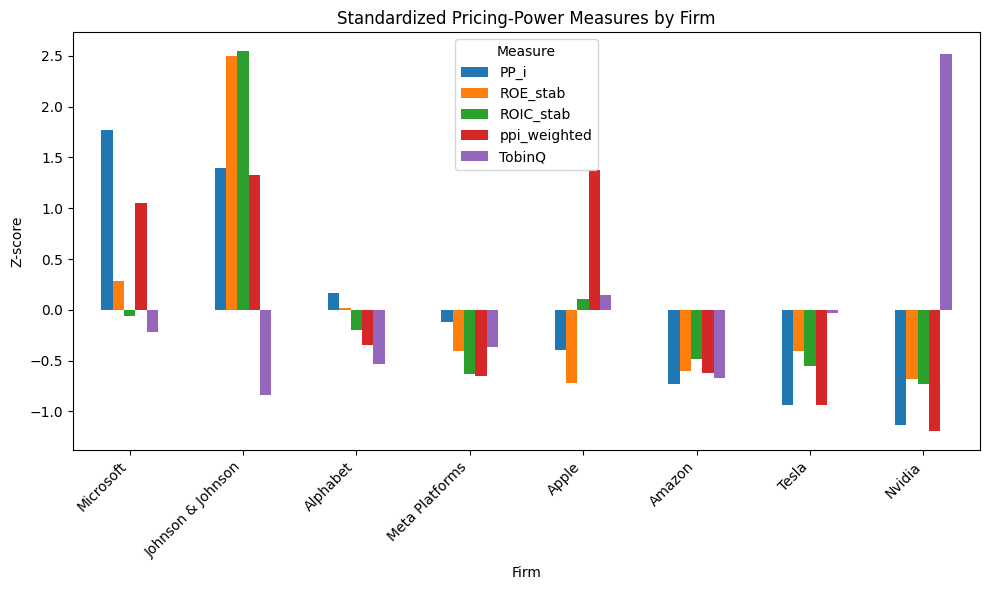

In [28]:
import pandas as pd
import numpy as np
import ast
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df_pp = pd.read_csv('C:/Users/Lfran/OneDrive/Master thesis/Pricing power/Measurement/0_Data/generated_csv/sp500_pricing_power.csv', usecols=['Ticker', 'Pricing Power'])
df_roe = pd.read_csv('C:/Users/Lfran/OneDrive/Master thesis/Pricing power/Measurement/0_Data/generated_csv/sp500_roe_power.csv', usecols=['Ticker', 'ROE Power'])
df_roic = pd.read_csv('C:/Users/Lfran/OneDrive/Master thesis/Pricing power/Measurement/0_Data/generated_csv/sp500_roic_power.csv', usecols=['Ticker', 'ROIC Power'])
df_changes = pd.read_csv('C:/Users/Lfran/OneDrive/Master thesis/Pricing power/Measurement/0_Data/generated_csv/sp500_pricing_power_changes.csv', usecols=['Ticker', 'Changes'])

# 2) Load Changes & compute ppi_weighted
df_ch = pd.read_csv('C:/Users/Lfran/OneDrive/Master thesis/Pricing power/Measurement/0_Data/generated_csv/sp500_pricing_power_changes.csv', usecols=['Ticker','Changes'])
df_ch['ChangesList'] = df_ch['Changes'].apply(ast.literal_eval)
df_ch['ppi_weighted'] = df_ch['ChangesList'].apply(lambda lst: 1/np.std(lst) if np.std(lst)!=0 else np.nan)
df_ch = df_ch[['Ticker','ppi_weighted']]

# 3) Load Tobin's Q (export this from your Tobin's-Q notebook)
df_tq = pd.read_csv('C:/Users/Lfran/OneDrive/Master thesis/Pricing power/Measurement/0_Data/generated_csv/tobins_q.csv', usecols=['Ticker',"Tobin's Q"])

# 4) Merge all five measures
df = (df_pp
      .merge(df_roe,  on='Ticker')
      .merge(df_roic, on='Ticker')
      .merge(df_ch,   on='Ticker')
      .merge(df_tq,   on='Ticker'))

# 5) Select your firms & relabel index
ticker_map = {
    'AAPL':'Apple','MSFT':'Microsoft','AMZN':'Amazon','GOOGL':'Alphabet',
    'TSLA':'Tesla','JNJ':'Johnson & Johnson','NVDA':'Nvidia','META':'Meta Platforms'
}
df_sel = df[df['Ticker'].isin(ticker_map)].copy()
df_sel.index = df_sel['Ticker'].map(ticker_map)

# 6) Standardize to z-scores
measures = ['Pricing Power','ROE Power','ROIC Power','ppi_weighted',"Tobin's Q"]
scaler = StandardScaler()
df_std = pd.DataFrame(
    scaler.fit_transform(df_sel[measures]),
    index=df_sel.index,
    columns=['PP_i','ROE_stab','ROIC_stab','ppi_weighted','TobinQ']
)

# 7) Summary table: min, mean, median, max (rounded 4 decimals)
pd.set_option('display.float_format','{:.4f}'.format)
summary = df_std.agg(['min','mean','median','max']).T.round(4)
print(summary)

# 8) Grouped bar chart
ax = df_std.plot.bar(figsize=(10,6))
ax.set_title("Standardized Pricing-Power Measures by Firm")
ax.set_ylabel('Z-score')
ax.set_xlabel('Firm')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Measure')
plt.tight_layout()
plt.show()


In [39]:
import pandas as pd
import glob


# Find all CSV files in /mnt/data
csv_files = glob.glob('C:/Users/Lfran/OneDrive/Master thesis/Pricing power/Measurement/0_Data/generated_csv/*.csv')
html_content = ""
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    html_content += f"<h2>Table: {csv_file.split('/')[-1]}</h2>\n"
    html_content += df.to_html(index=False, border=1) + "\n<br/>\n"

# Write to an HTML file
output_path = 'C:/Users/Lfran/OneDrive/Master thesis/Pricing power/Measurement/0_Data/generated_csv/results.xlsx'
with open(output_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

output_path

'C:/Users/Lfran/OneDrive/Master thesis/Pricing power/Measurement/0_Data/generated_csv/results.xlsx'